In [1]:
import glob
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import xclim as xc
import cftime
import seaborn as sns

In [2]:
location_name = 'Adelaide'
lat = -34.92
lon = 138.62

In [3]:
evspsblpot_allen98_files = sorted(glob.glob('/g/data/xv83/dbi599/treasury/evspsblpot-allen98_day_ACCESS-ESM1-5_*.nc'))
ds_evspsblpot_allen98 = xr.open_mfdataset(evspsblpot_allen98_files)
da_evspsblpot_allen98 = ds_evspsblpot_allen98['evspsblpot'].sel({'lat': lat, 'lon': lon}, method='nearest')
da_evspsblpot_allen98 = da_evspsblpot_allen98.compute()
da_evspsblpot_allen98_ann = da_evspsblpot_allen98.resample({'time': 'YE'}).mean('time', keep_attrs=True)
da_evspsblpot_allen98_ann = da_evspsblpot_allen98_ann.compute()

In [4]:
evspsblpot_hargreaves85_files = [
    '/g/data/xv83/dbi599/treasury/evspsblpot-hargreaves85_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn_19500101-19991231.nc',
    '/g/data/xv83/dbi599/treasury/evspsblpot-hargreaves85_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn_20000101-20141231.nc',
    '/g/data/xv83/dbi599/treasury/evspsblpot-hargreaves85_day_ACCESS-ESM1-5_ssp370_r1i1p1f1_gn_20150101-20641231.nc',
    '/g/data/xv83/dbi599/treasury/evspsblpot-hargreaves85_day_ACCESS-ESM1-5_ssp370_r1i1p1f1_gn_20650101-21001231.nc',
]
ds_evspsblpot_hargreaves85 = xr.open_mfdataset(evspsblpot_hargreaves85_files)
da_evspsblpot_hargreaves85 = ds_evspsblpot_hargreaves85['evspsblpot'].sel({'lat': lat, 'lon': lon}, method='nearest')
da_evspsblpot_hargreaves85 = da_evspsblpot_hargreaves85.compute()
da_evspsblpot_hargreaves85_ann = da_evspsblpot_hargreaves85.resample({'time': 'YE'}).mean('time', keep_attrs=True)
da_evspsblpot_hargreaves85_ann = da_evspsblpot_hargreaves85_ann.compute()

In [5]:
pr_files = [
    '/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/day/pr/gn/latest/pr_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn_19500101-19991231.nc',
    '/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/day/pr/gn/latest/pr_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn_20000101-20141231.nc',
    '/g/data/fs38/publications/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1-5/ssp370/r1i1p1f1/day/pr/gn/latest/pr_day_ACCESS-ESM1-5_ssp370_r1i1p1f1_gn_20150101-20641231.nc',
    '/g/data/fs38/publications/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1-5/ssp370/r1i1p1f1/day/pr/gn/latest/pr_day_ACCESS-ESM1-5_ssp370_r1i1p1f1_gn_20650101-21001231.nc',
]
ds_pr = xr.open_mfdataset(pr_files)
da_pr = ds_pr['pr'].sel({'lat': lat, 'lon': lon}, method='nearest')
da_pr = da_pr.compute()
da_pr_ann = da_pr.resample({'time': 'YE'}).mean('time', keep_attrs=True)
da_pr_ann = da_pr_ann.compute()

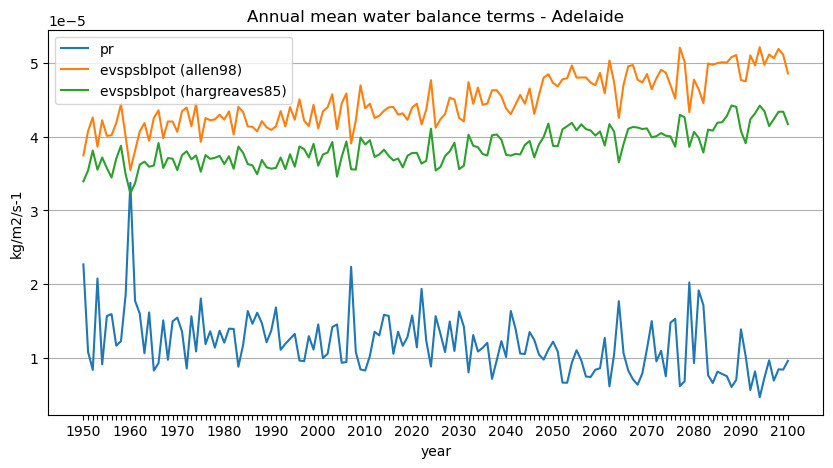

In [6]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot()
ax.plot(
    da_pr_ann.time.dt.strftime('%Y').values,
    da_pr_ann.values,
    label='pr'
)
ax.plot(
    da_evspsblpot_allen98_ann.time.dt.strftime('%Y').values,
    da_evspsblpot_allen98_ann.values,
    label='evspsblpot (allen98)'
)
ax.plot(
    da_evspsblpot_hargreaves85_ann.time.dt.strftime('%Y').values,
    da_evspsblpot_hargreaves85_ann.values,
    label='evspsblpot (hargreaves85)'
)
ax.set_ylabel('kg/m2/s-1')
ax.set_xlabel('year')
ax.set_title(f'Annual mean water balance terms - {location_name}')
ax.legend()
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)
plt.show()

In [7]:
wb_allen98 = da_pr - da_evspsblpot_allen98
wb_hargreaves85 = da_pr - da_evspsblpot_hargreaves85

In [8]:
wb_allen98.attrs['units'] = da_pr.attrs['units']
wb_hargreaves85.attrs['units'] = da_pr.attrs['units']

In [9]:
da_spei_allen98_gamma = xc.indices.standardized_precipitation_evapotranspiration_index(
    wb_allen98, freq='MS', window=12, cal_start='1950-01-01', cal_end='2014-12-31', dist='gamma'
)
da_spei_allen98_gamma_ann = da_spei_allen98_gamma.resample({'time': 'YE'}).mean('time', keep_attrs=True)

In [10]:
da_spei_allen98_fisk = xc.indices.standardized_precipitation_evapotranspiration_index(
    wb_allen98, freq='MS', window=12, cal_start='1950-01-01', cal_end='2014-12-31', dist='fisk'
)
da_spei_allen98_fisk_ann = da_spei_allen98_fisk.resample({'time': 'YE'}).mean('time', keep_attrs=True)

In [11]:
da_spei_hargreaves85_gamma = xc.indices.standardized_precipitation_evapotranspiration_index(
    wb_hargreaves85, freq='MS', window=12, cal_start='1950-01-01', cal_end='2014-12-31', dist='gamma'
)
da_spei_hargreaves85_gamma_ann = da_spei_hargreaves85_gamma.resample({'time': 'YE'}).mean('time', keep_attrs=True)

In [12]:
da_spei_hargreaves85_fisk = xc.indices.standardized_precipitation_evapotranspiration_index(
    wb_hargreaves85, freq='MS', window=12, cal_start='1950-01-01', cal_end='2014-12-31', dist='fisk'
)
da_spei_hargreaves85_fisk_ann = da_spei_hargreaves85_fisk.resample({'time': 'YE'}).mean('time', keep_attrs=True)

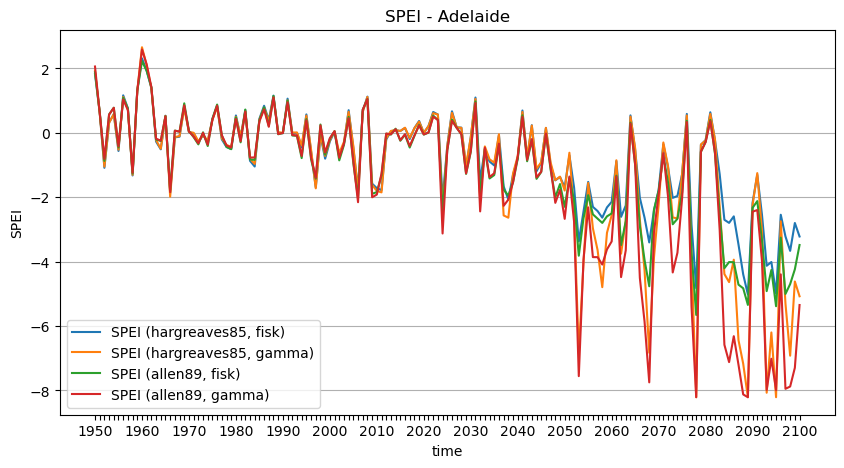

In [13]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot()
ax.plot(
    da_spei_hargreaves85_fisk_ann.time.dt.strftime('%Y').values,
    da_spei_hargreaves85_fisk_ann.values,
    label='SPEI (hargreaves85, fisk)',
)
ax.plot(
    da_spei_hargreaves85_gamma_ann.time.dt.strftime('%Y').values,
    da_spei_hargreaves85_gamma_ann.values,
    label='SPEI (hargreaves85, gamma)',
)
ax.plot(
    da_spei_allen98_fisk_ann.time.dt.strftime('%Y').values,
    da_spei_allen98_fisk_ann.values,
    label='SPEI (allen89, fisk)',
)
ax.plot(
    da_spei_allen98_gamma_ann.time.dt.strftime('%Y').values,
    da_spei_allen98_gamma_ann.values,
    label='SPEI (allen89, gamma)',
)
ax.set_ylabel('SPEI')
ax.set_xlabel('time')
ax.set_title(f'SPEI - {location_name}')
ax.legend()
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)
plt.show()